**Libraries**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

**Dataset and it's information**

In [2]:
data=pd.read_csv("Creditcard_data.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [4]:
data.nunique()

Time      415
V1        765
V2        765
V3        765
V4        765
V5        765
V6        765
V7        765
V8        765
V9        765
V10       765
V11       765
V12       765
V13       765
V14       765
V15       765
V16       765
V17       765
V18       765
V19       765
V20       765
V21       765
V22       765
V23       765
V24       765
V25       765
V26       765
V27       765
V28       765
Amount    523
Class       2
dtype: int64

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data["Class"].value_counts()

0    763
1      9
Name: Class, dtype: int64

**Balancing Classes**

In [7]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

x = data.drop(['Class'], axis=1)
y = data['Class']

ros = RandomOverSampler(sampling_strategy=1.0)
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [8]:
resampled_data = np.concatenate((x_ros, y_ros[:, np.newaxis]), axis=1)

# Converting the concatenated array to a DataFrame
columns = list(x.columns) + ['Class']
df = pd.DataFrame(resampled_data, columns=columns)

In [9]:
df.shape

(1526, 31)

In [10]:
df["Class"].value_counts()

0.0    763
1.0    763
Name: Class, dtype: int64

**Simple random sampling**

In [11]:
srs = df.sample(n=450, random_state=42)
srs.shape

(450, 31)

Logistic Regression  Accuracy: 0.8556
SVM Accuracy: 0.6889
 Naive Bayes Accuracy: 0.7556
Decision Trees Accuracy: 0.9222
KNN Accuracy: 0.9556


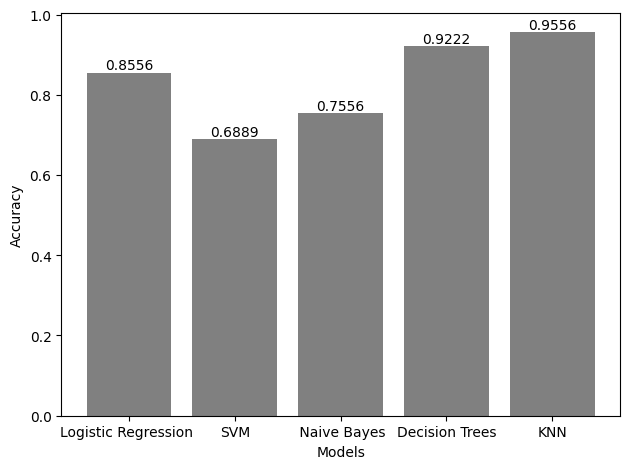

In [12]:
X = srs.drop('Class', axis=1)
y = srs['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(random_state=42)
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(max_depth=3,random_state=42)
knn_model = KNeighborsClassifier()

models = [lr_model, svm_model, nb_model, dt_model, knn_model]
model_names = ['Logistic Regression ', 'SVM', ' Naive Bayes', 'Decision Trees', 'KNN']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy:.4f}")

fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, color='grey')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

for bar, acc in zip(bars, accuracies):
    yval = round(acc, 4)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Systematic Sampling**

In [13]:
import random

ss = df.sample(frac=1, random_state=42).reset_index(drop=True)

sampling_interval = 3
num_samples = len(ss)
SystematicSample = ss.iloc[::sampling_interval]
SystematicSample.shape

(509, 31)

Logistic Regression Accuracy: 0.9020
SVM Accuracy: 0.6765
Naive Bayes Accuracy: 0.7549
Decision Trees Accuracy: 0.9608
KNN Accuracy: 0.9118


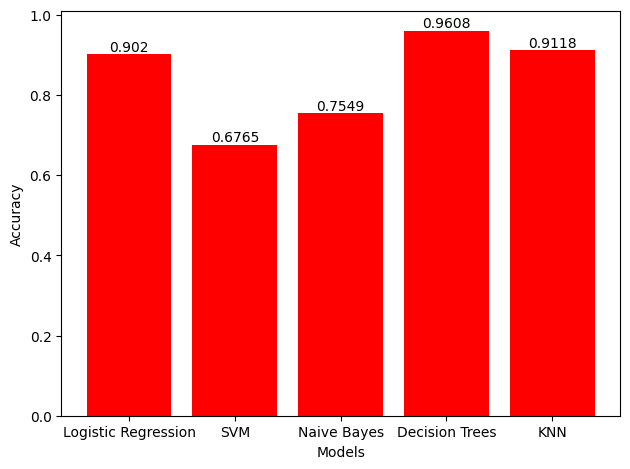

In [14]:
X = SystematicSample.drop('Class', axis=1)
y = SystematicSample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

models = [lr_model, svm_model, nb_model, dt_model, knn_model]
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy:.4f}")

fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, color='red')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

for bar, acc in zip(bars, accuracies):
    yval = round(acc, 4)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Cluster Sampling**

In [15]:
from sklearn.cluster import KMeans
random.seed(42)
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)

clusters = kmeans.fit_predict(df)
clusters = pd.Series(clusters)

selected_clusters = random.sample(range(num_clusters), 3)
ClusterSample = df.loc[clusters.isin(selected_clusters)]
print(ClusterSample.shape)

(718, 31)


Logistic Regression Accuracy: 0.9583
SVM Accuracy: 0.8403
Naive Bayes Accuracy: 0.9861
Decision Trees Accuracy: 0.9931
KNN Accuracy: 0.9861


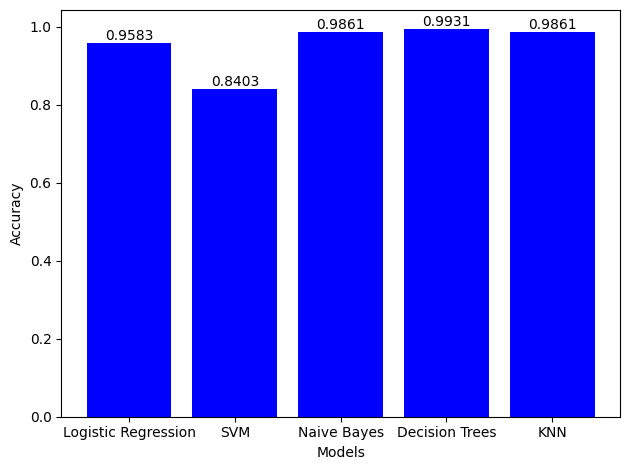

In [16]:
X = ClusterSample.drop('Class', axis=1)
y = ClusterSample['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

models = [lr_model, svm_model, nb_model, dt_model, knn_model]
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"{name} Accuracy: {accuracy:.4f}")

fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, color='blue')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

for bar, acc in zip(bars, accuracies):
    yval = round(acc, 4)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Stratified Sampling**

In [17]:
stratifiedsampling = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(frac=0.6))

In [18]:
SS=stratifiedsampling.sample(frac= 0.45)
SS.shape

(412, 31)

Logistic Regression Accuracy: 0.8554
SVM Accuracy: 0.7952
Naive Bayes Accuracy: 0.7831
Decision Trees Accuracy: 0.9157
KNN Accuracy: 0.9036


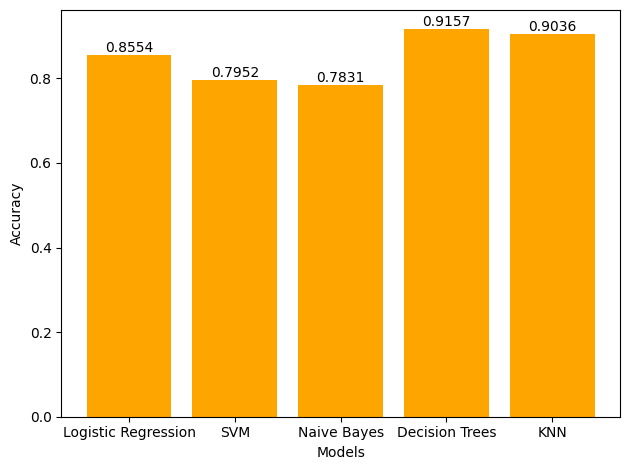

In [19]:
X_ss = SS.drop('Class', axis=1)
y_ss = SS['Class']

X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y_ss, test_size=0.2, random_state=42)

lr_model_ss = LogisticRegression(random_state=42)
svm_model_ss = SVC(random_state=42)
nb_model_ss = GaussianNB()
dt_model_ss = DecisionTreeClassifier(random_state=42)
knn_model_ss = KNeighborsClassifier()

models_ss = [lr_model_ss, svm_model_ss, nb_model_ss, dt_model_ss, knn_model_ss]
model_names_ss = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies_ss = []

for model_ss, name_ss in zip(models_ss, model_names_ss):
    model_ss.fit(X_train_ss, y_train_ss)
    y_pred_ss = model_ss.predict(X_test_ss)
    accuracy_ss = accuracy_score(y_test_ss, y_pred_ss)
    accuracies_ss.append(accuracy_ss)
    print(f"{name_ss} Accuracy: {accuracy_ss:.4f}")

fig_ss, ax_ss = plt.subplots()
bars_ss = ax_ss.bar(model_names_ss, accuracies_ss, color='orange')

ax_ss.set_xlabel('Models')
ax_ss.set_ylabel('Accuracy')

for bar_ss, acc_ss in zip(bars_ss, accuracies_ss):
    yval_ss = round(acc_ss, 4)
    plt.text(bar_ss.get_x() + bar_ss.get_width()/2, yval_ss, f'{yval_ss}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Bootstrap Sampling**

In [20]:
n_bootstrap = 100
desired_sample_size = 400

bootstrap_samples = pd.DataFrame()

for _ in range(n_bootstrap):
    resampled_data = df.sample(n=len(df), replace=True, random_state=42)
    bootstrap_samples = pd.concat([bootstrap_samples, resampled_data])

    if bootstrap_samples.shape[0] >= desired_sample_size:
        break

bootstrap_samples = bootstrap_samples.iloc[:desired_sample_size, :]
print("Final Shape of Bootstrap Samples DataFrame:", bootstrap_samples.shape)

Final Shape of Bootstrap Samples DataFrame: (400, 31)


Logistic Regression Accuracy: 0.9375
SVM Accuracy: 0.6875
Naive Bayes Accuracy: 0.7250
Decision Trees Accuracy: 0.9750
KNN Accuracy: 0.9750


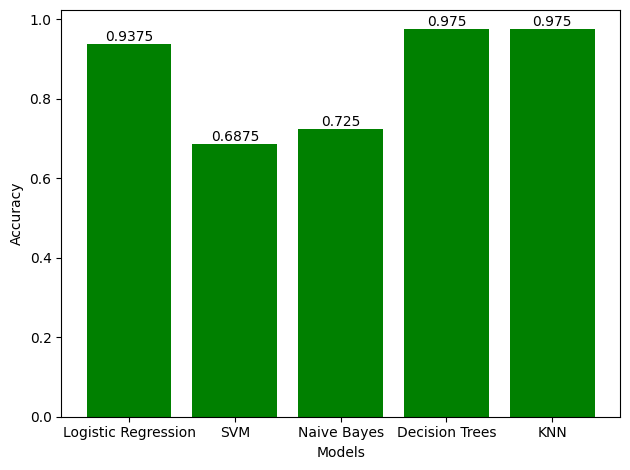

In [21]:
X_bs = bootstrap_samples.drop('Class', axis=1)
y_bs = bootstrap_samples['Class']

X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_bs, y_bs, test_size=0.2, random_state=42)

lr_model_bs = LogisticRegression(random_state=42)
svm_model_bs = SVC(random_state=42)
nb_model_bs = GaussianNB()
dt_model_bs = DecisionTreeClassifier(random_state=42)
knn_model_bs = KNeighborsClassifier()

models_bs = [lr_model_bs, svm_model_bs, nb_model_bs, dt_model_bs, knn_model_bs]
model_names_bs = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Trees', 'KNN']

accuracies_bs = []

for model_bs, name_bs in zip(models_bs, model_names_bs):
    model_bs.fit(X_train_bs, y_train_bs)
    y_pred_bs = model_bs.predict(X_test_bs)
    accuracy_bs = accuracy_score(y_test_bs, y_pred_bs)
    accuracies_bs.append(accuracy_bs)
    print(f"{name_bs} Accuracy: {accuracy_bs:.4f}")

fig_bs, ax_bs = plt.subplots()
bars_bs = ax_bs.bar(model_names_bs, accuracies_bs, color='green')

ax_bs.set_xlabel('Models')
ax_bs.set_ylabel('Accuracy')

for bar_bs, acc_bs in zip(bars_bs, accuracies_bs):
    yval_bs = round(acc_bs, 4)
    plt.text(bar_bs.get_x() + bar_bs.get_width()/2, yval_bs, f'{yval_bs}', ha='center', va='bottom')

plt.tight_layout()
plt.show()